题目：

自己构建数据，自己写出EM算法来分类给出的数据

## 1.导入数据

导入库

In [1]:
import numpy as np
from scipy.stats import multivariate_normal  # 多元高斯分布的库
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

构造数据集

In [9]:
if __name__ == '__main__':
    style = 'myself'

    # 构造第一个高斯分布数据
    np.random.seed(0)  # 保证数据从0开始

    # 构造第一个数据
    mu1_fact = (0,0,0)           # 均值
    cov1_fact = np.diag((1,2,3)) # 方差
    data1 = np.random.multivariate_normal(mu1_fact,cov1_fact,400)  # 造400个样本

    # 构造第二个数据
    mu2_fact = (2,2,1)           # 均值
    cov2_fact = np.array(((1,1,3),(1,2,1),(0,0,1))) # 方差
    data2 = np.random.multivariate_normal(mu2_fact,cov2_fact,100)  # 造100个样本

    # 将两个数据叠在一起
    data = np.vstack((data1,data2))
    y = np.array([True] * 400 + [False] * 100)  # 只是用于精度的对比

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


## 2.学习过程（包括使用sklearn和自己编程）

公式1：
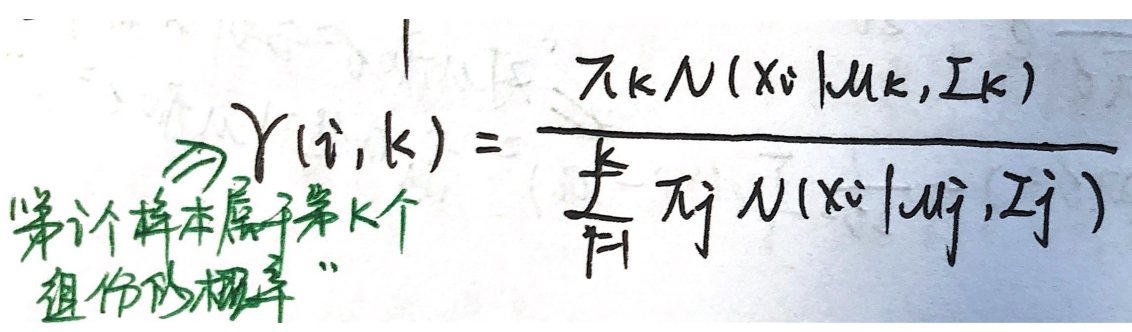

公式2：
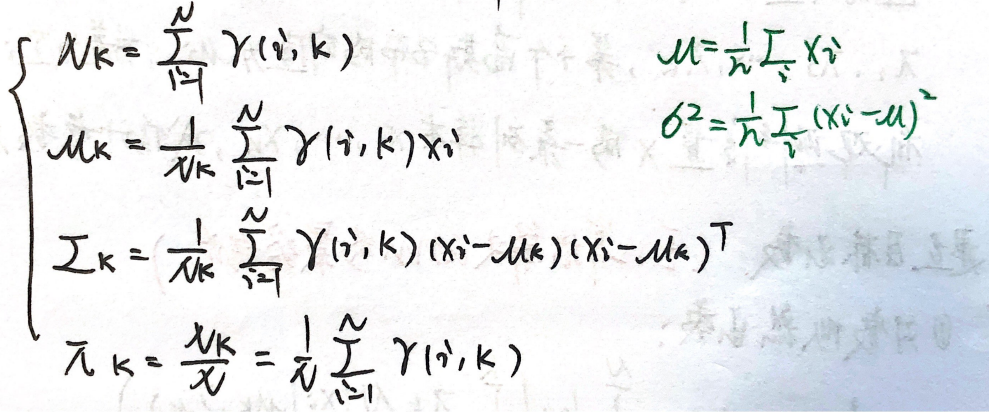

In [3]:
# 使用sklearn中的 EM 算法来拟合 GMM 模型
if style == 'sklearn':  # 当我们使用sklearn的情况下
    
    # 拟合模型
    g = GaussianMixture(n_components=2,covariance_type='full',tol=1e-6,max_iter=1000) # 类别：2 类型：full 迭代次数：1000
    g.fit(data)
    
    # 打印拟合结束的均值方差
    print('类别概率：\t',g.weights_[0])
    print('均值:\n',g.means_,'\n')
    print('方差：\n',g.covariances_,'\n')
    
    # 将学习完成的均值和方差取出
    mu1,mu2 = g.means_
    sigma1,sigma2 = g.covariances_
else:   # 在我们使用自己编程的情况下
    # 迭代80次
    num_iter = 80
    n,d = data.shape
    
    # 随机指定
    mu1 = np.random.standard_normal(d)
    print(mu1)
    mu2 = np.random.standard_normal(d)
    print(mu2)
    # mu1 = data.min(axis=0)
    # mu2 = data.max(axis=0)  # 不同于上面的随机给定
    sigma1 = np.identity(d)
    sigma2 = np.identity(d)
    pi = 0.5
    
    # EM 算法的编写
    for i in range(num_iter):
        
        # E step
        norm1 = multivariate_normal(mu1,sigma1)
        norm2 = multivariate_normal(mu2,sigma2) # 公式1中的 N
        taul = pi * norm1.pdf(data)
        tau2 = (1 - pi) * norm2.pdf(data)      # 公式1中分子的部分
        gamma = taul / (taul + tau2)           # 第一个公式的gamma
         
        # M step（jeson不等式推导的下界值）
        mu1 = np.dot(gamma,data) / np.sum(gamma)
        mu2 = np.dot((1 - gamma),data) / np.sum((1 - gamma))
        sigma1 = np.dot(gamma * (data - mu1).T,data - mu1) / np.sum(gamma)
        sigma2 = np.dot((1 - gamma) * (data - mu2).T,data - mu2) / np.sum((1 - gamma))
        pi = np.sum(gamma) / n
        print(pi)
        
        print(i , ':\t' , mu1,mu2)
        
    # 打印拟合结束的均值方差
    print('类别概率：\t',pi)
    print('均值:\t',mu1,mu2)
    print('方差：\n',sigma1 ,'\n\n' , sigma2,'\n')

[ 0.01323977 -0.12194493  0.33905926]
[-0.58963204 -0.89581576  0.54832813]
0.678657719156737
0 :	 [0.6256226  0.92692721 0.16765385] [-0.22158799 -0.69512054  0.32012665]
0.6592162712485362
1 :	 [0.64100182 0.96284179 0.16819056] [-0.20300503 -0.67205758  0.31038997]
0.6378101632072051
2 :	 [0.66729084 1.00427753 0.18726277] [-0.19941714 -0.64839954  0.26839989]
0.6171866678608613
3 :	 [0.69352073 1.04112894 0.21392326] [-0.19501341 -0.61877733  0.22104565]
0.5973599633660124
4 :	 [0.71881939 1.07346478 0.24406797] [-0.18879371 -0.58501433  0.175972  ]
0.5781187561259941
5 :	 [0.7441104  1.10192514 0.27557788] [-0.18205636 -0.54837447  0.13589859]
0.5593529715429996
6 :	 [0.77025382 1.12680964 0.30732955] [-0.1758     -0.50968148  0.10154184]
0.5410241526154227
7 :	 [0.79776859 1.14826089 0.33876514] [-0.17045355 -0.46961553  0.07270467]
0.5231140107417287
8 :	 [0.8269153  1.16640605 0.36964842] [-0.16606268 -0.42875795  0.04881993]
0.5055940075935461
9 :	 [0.85782561 1.18143109 0.399

## 3.预测分类

In [4]:
norm1 = multivariate_normal(mu1,sigma1)
norm2 = multivariate_normal(mu2,sigma2)

# 在这样的X之下，每一个样本的概率密度值是什么（哪个大就是哪个类）
tua1 = norm1.pdf(data)
tua2 = norm2.pdf(data)

## 4.画图

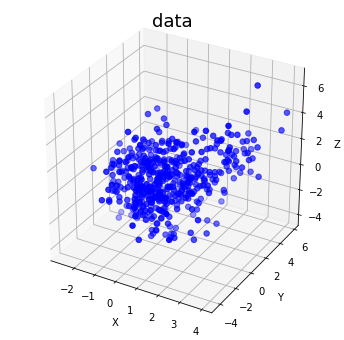

In [5]:
# 原始数据绘图
fig1 = plt.figure(figsize=(13,6),facecolor='w')
ax = fig1.add_subplot(121,projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2],c='b',s=30,marker='o',depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('data',fontsize=18)
plt.show()

[1 0]
准确率：89.80%


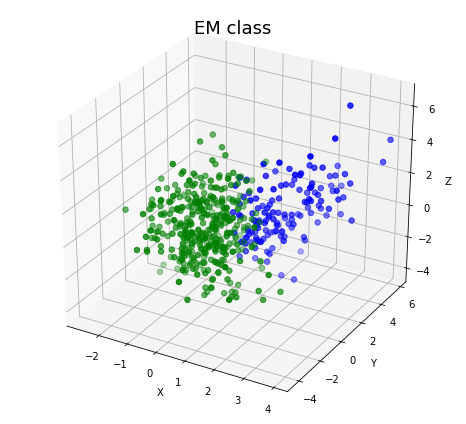

In [6]:
# 预测数据绘图
fig2 = plt.figure(figsize=(13,6),facecolor='w')
ax = fig2.add_subplot(121,projection='3d')
order = pairwise_distances_argmin([mu1_fact,mu2_fact],[mu1,mu2],metric='euclidean')

# 如果order是（0,1）则顺序正确，否则顺序反了
print(order)
if order[0] == 0:
    c1 = tua1 > tua2
else:
    c1 = tua1 < tua2
c2 = ~c1
acc = np.mean(y == c1)
print('准确率：%.2f%%' % (100*acc))

# 绘制出不同的类别
ax.scatter(data[c1,0],data[c1,1],data[c1,2],c='g',s=30,marker='o',depthshade=True)
ax.scatter(data[c2,0],data[c2,1],data[c2,2],c='b',s=30,marker='o',depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('EM class',fontsize=18)

plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()

总结：

用sklearn直接实现结果是：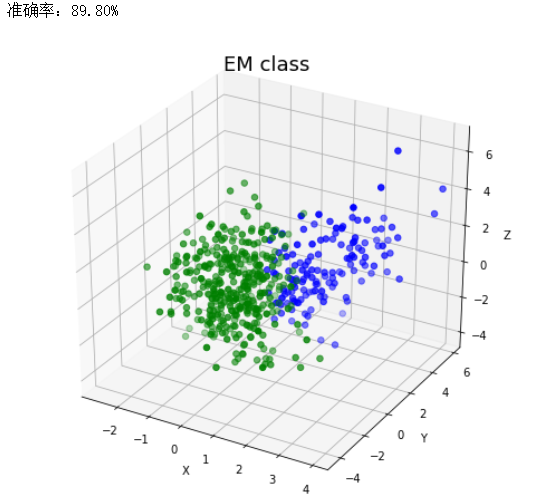
用自己写的EM算法结果是：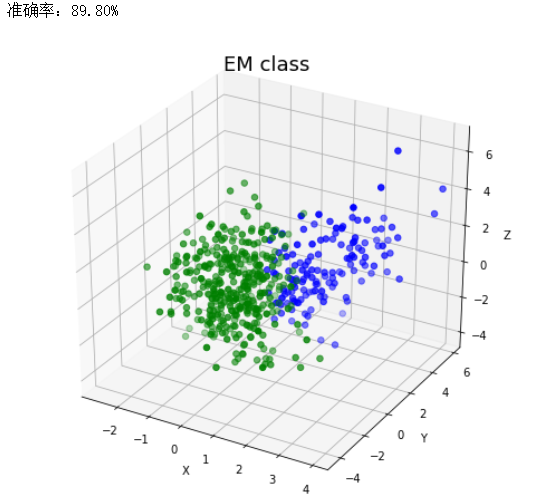